# Practical Machine Learning for Physicists


## Markov Processes
In the optional video we introduced three types of Markov Process which all made use of the Markov Property:

A state $S_t$ is *Markov* if and only if 
$$ P\left[S_{t+1} | S_{t} \right] = P\left[S_{t+1} | S_1, \cdots, S_{t} \right] $$

That is the state captures all of the relevant information from the history. We do not need to store the history of the states only the current state.

> "The future is independent of the past given the present"

### Markov Chain
A *Markov Chain* is a tuple $<\mathcal{S},\mathcal{P}>$ where
- $\mathcal{S}$ is the finite set of states
- $\mathcal{P}$ is the state transition probability matrix
$$\mathcal{P}_{ss^\prime} = \mathbb{P}\left[S_{t+1}=s^\prime | S_t = s\right]$$

### Markov Reward Process
A *Markov Reward Process* (MRP) is a Markov chain with values $<\mathcal{S},\mathcal{P}, \mathcal{R}, \gamma>$
- $\mathcal{R}$ is the reward function, $\mathcal{R}_s=\mathbb{E}\left[R_{t+1} | S_t=s\right]$
- $\gamma$ is the discount factor $0 \leq \gamma \leq 1$

### Return
The return $G_t$ is the total discounted reward from the future
$$G_t = R_{t+1} + \gamma R_{t+2} + \gamma^2 R_{t+3} + \cdots = \sum_{i=0}^\infty \gamma^i R_{t+i+1}$$

### Value Function
The value function $v(s)$ is the expected return value startong from state $s$
$$ v(s) = \mathbb{E}\left[ G_t | S_t=s\right] $$



### Bellman Equation for Markov Reward Processes
We can decompose the value function into two parts:
- immediate reward $R_{t+1}$
- discounted value of next state $\gamma v\left(S_{t+1}\right)$
$$v(s) = \mathbb{E} \left[R_{t+1} + \gamma v\left(S_{t+1}\right) | S_t=s\right] $$

Or in matrix form using $v_{t+1}=\mathcal{P} v_t$ and dropping the indices for cleanliness
$$ v = \mathcal{R} + \gamma \mathcal{P} v $$

#### Solving the Bellman Equation for MRPs
The Bellman equation is a soluble linear equation with solution
$$ v = \left(I - \gamma \mathcal{P}\right)^{-1} \mathcal{R}$$

The computational complexity is $O(n^3)$ for $n$ states, so the direct solution is only possible for small MRPs. For large MRPs we need to use iterative methods to get the solution.

### Markov Decision Process
A *Markov Decision Process* (MDP) is a Markov reward process with decisions. The tuple is $<\mathcal{S},\mathcal{A}, \mathcal{P}, 
\mathcal{R}, \gamma>$
- $\mathcal{S}$ is the finite set of states
- $\mathcal{A}$ is the finite set of actions
- $\mathcal{P}$ is the state transition probability matrix
$$\mathcal{P^a}_{ss^\prime} = \mathbb{P}\left[S_{t+1}=s^\prime | S_t = s, A_t=a\right]$$
- $\mathcal{R}$ is the reward function, $\mathcal{R}^a_s=\mathbb{E}\left[R_{t+1} | S_t=s, A_t=a\right]$
- $\gamma$ is the discount factor $0 \leq \gamma \leq 1$

### Policies
A *policy* $\pi$ is a distribution over actions given states
$$ \pi(a|s) = \mathbb{P} \left[ A_t=a | S_t=s \right]$$

The policy fully defines the behaviour of the agent. The policies (like all things Markov) depend on the state and not on the history.

A policy can reduce a Markov Decision Process to a Markov Reward Process  $<\mathcal{S}, \mathcal{P}^\pi, 
\mathcal{R}^\pi, \gamma>$ where
$$P^{\pi}_{ss^\prime}=\sum_{a \in A} \pi \left(a|s\right)P^a_{ss^\prime}$$
$$R^{\pi}_{ss^\prime}=\sum_{a \in A} \pi \left(a|s\right)R^a_{ss^\prime}$$

### Value Functions
The *state-value function* is the expected reutrn from state $s$ if policy $\pi$ is followed
$$v_\pi(s) = \mathbb{E}_\pi \left[ G_t | S_t=s \right]$$

The *action-value function* is the expected return from state $s$, taking action $a$, if policy $\pi$ is followed
$$q_\pi(s,a) = \mathbb{E}_\pi \left[ G_t | S_t=s,A_t=a \right]$$

### Optimal Value functions
The optimal state-value function $v_*(s)$
$$v_*(s) = \max_\pi v_\pi (s)$$

The optimal action-value function $q_* (s,a)$
$$q_*(s,a) = \max_\pi q_\pi (s,a)$$


### Bellman Optimality Equations
There are optimality equations for both the state-value and action-value functions. They both involve selecting the action that gives the maximum reward and summing over the states
$$v_*(s) = \max_a \mathcal{R}^a_s + \gamma \sum_{s^\prime \in S} \mathcal{P}^{a}_{s s^\prime} v_* (s^\prime)$$
$$q_*(s,a) = \mathcal{R}^a_s + \gamma \sum_{s^\prime \in S} \mathcal{P}^{a}_{s s^\prime} \max_{a^\prime} q_* (s^\prime, a^\prime)$$

### Dynamic Programming

#### Iterative Policy Evaluation
How do we evaluate a given policy $\pi$? Evaluating the policy is  the same as determining the value function $v_\pi$.

In psuedo-code what we want to do is
- Loop over iteration $i$
    - Loop over all the states in $s \in S$
    - Update the value function $v_{k+1}(s)$ from $v_k(s^\prime)$
$$ v_{k+1}(s) = \sum_{a \in \mathcal{A} } \pi(a | s) \left( \mathcal{R}^a_s + \gamma \sum_{s^\prime \in \mathcal{S}} \mathcal{P}^a_{ss^\prime} v_k(s^\prime) \right) $$
Or in matrix notation
$$\mathbf{v}^{k+1} = \mathbf{\mathcal{R}}^\pi + \gamma \mathbf{\mathcal{P}}^\pi \mathbf{v}^k $$




In [1]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib
matplotlib.rcParams['figure.dpi']=300 # highres display

# for subplots within subplots:
from matplotlib import gridspec

from time import sleep

In [2]:
from enum import IntEnum
class Dir(IntEnum):
    Up=0
    Down=1
    Left=2
    Right=3


class GridWorld():
    def __init__(self,nCol,nRow,goal=None):   #nCol is number of columns, nRow is number of rows, goal is a list of (row,col) tuples of goal cells
        self.nCol=nCol
        self.nRow=nRow
        if goal is None:
            self.goal=[(0,0),(nRow-1,nCol-1)]
        else:
            self.goal=goal
        
    def getZeroGrid(self):
        return np.zeros((self.nRow,self.nCol))
    
    def getNumberGrid(self):
        return np.arange(self.nRow*self.nCol).reshape(self.nRow,self.nCol)
    
    def getRandomPolicyGrid(self):
        policy=np.ones((self.nRow,self.nCol,4))
        return policy*0.25
    
    def go(self,row,col,way):
        if way==Dir.Up:
            row2=max(0,row-1)
            col2=col
        elif way==Dir.Down:
            row2=min(self.nRow-1,row+1)
            col2=col
        elif way==Dir.Left:
            row2=row
            col2=max(0,col-1)
        elif way==Dir.Right:
            row2=row
            col2=min(self.nCol-1,col+1)
        return (row2,col2)
    
    def get(self,vk,row,col,way):
        row2,col2=self.go(row,col,way)
        return vk[row2,col2]
            
def plotGridWorld(gw,cellText,showCorners, title=None, applyFormat=False):
    fig, ax = plt.subplots(figsize=(2,2))
    ax.axis('tight')
    ax.axis('off')
    nRow=cellText.shape[0]
    nCol=cellText.shape[1]
    cellColor=np.zeros((nRow,nCol))
    
    if applyFormat:
        # Format table numbers as string
        cellText = [['%.2f' % j for j in i] for i in cellText]

    the_table = ax.table(cellText,loc='center',cellLoc='center')
    for pos, cell in the_table._cells.items():
        if not showCorners:
            if pos in gw.goal:
                cell.set_text_props(color='grey')
                cell.set_color('grey') 
                cell.set_edgecolor('black')        
        cell._height = cell._width = 1./nRow
    if title:
        ax.set_title(title)

### Small Gridworld

The small gridworld consists of a $5 \times 5$ grid array with terminal goal states in the top-left and bottom-right corners. The rules of gridworld are:
- $-1$ reward each step
- stop when you reach the terminal goal state (hence the terminal)
- actions leading out of the grid leave the state unchanged (but still cost $-1$)


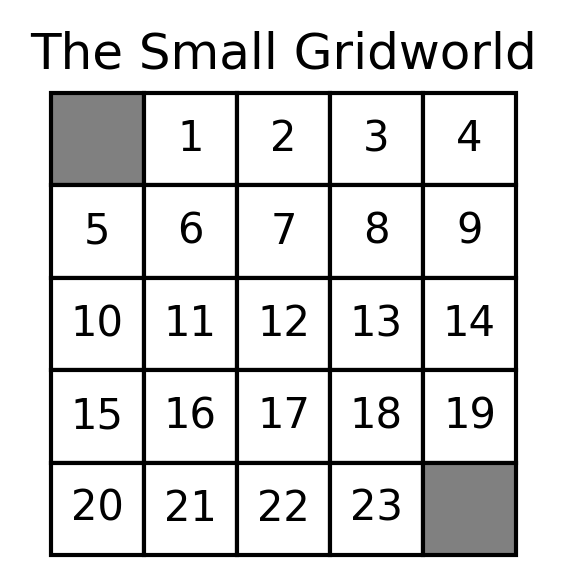

In [3]:
gw=GridWorld(5,5)
plotGridWorld(gw,gw.getNumberGrid(),title="The Small Gridworld",showCorners=False)

### Random policy
Following a random policy we had have equal odds of moving in any given direction. This means that a policy of any action in any states is $\pi(a|s)=0.25$ since there are four directions we can move in and we have equal odds of each direction.

$$ v_{k+1}(s) = \sum_{a \in \mathcal{A} }0.25  \left( \mathcal{R}^a_s + \gamma v_k(s^\prime) \right) $$
where $s^\prime$ is the state thate we end up in following action $a$ from state $s$. So if we start in state 10 and following action up we end up in state 6.

So let's start by initialising our grid world to have zero values everywhere.

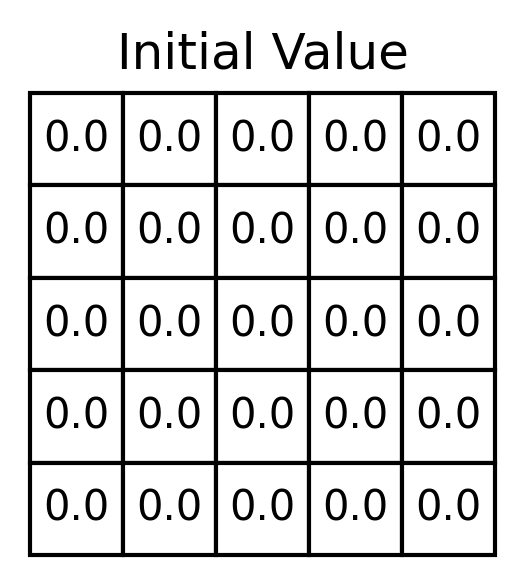

In [4]:
vk=gw.getZeroGrid()
plotGridWorld(gw,vk,showCorners=True,title="Initial Value")

#### Updating our values

Now we can use the update equation above to get a new estimate of the value. This new estimate will have two parts (for the non-terminal squares)
- -1 from moving
- the value of the square we move to

We will use our random policy $\pi(a|s)=0.25$ to average over the available directions to move.

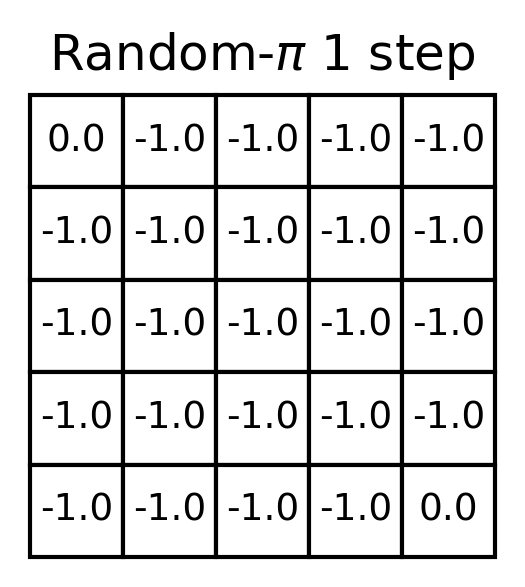

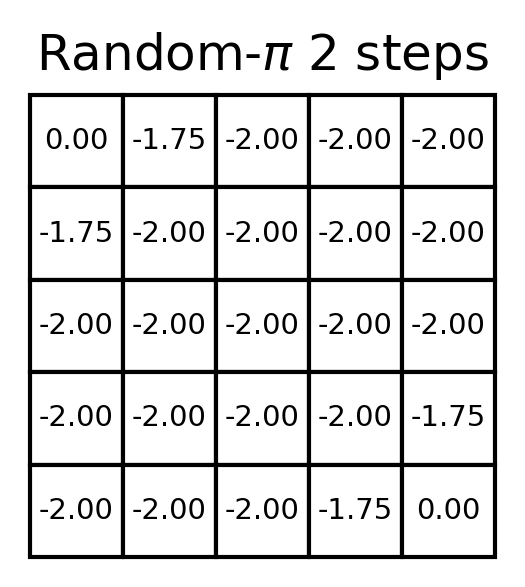

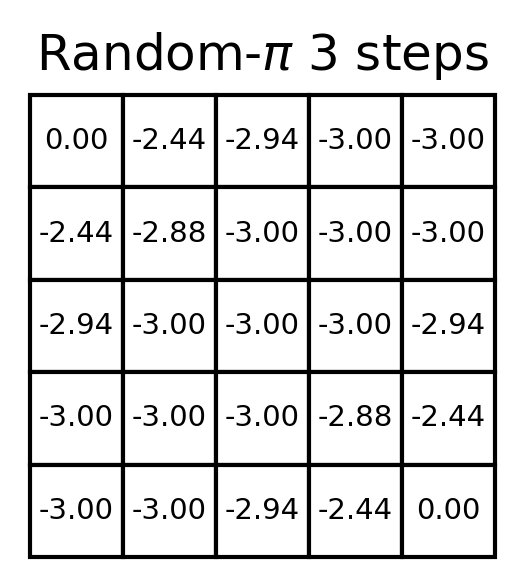

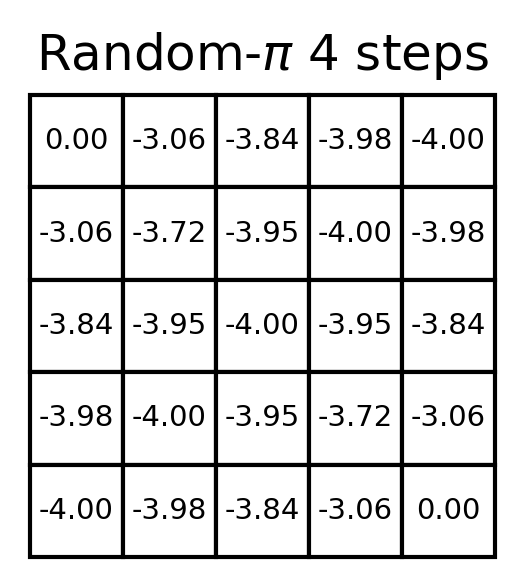

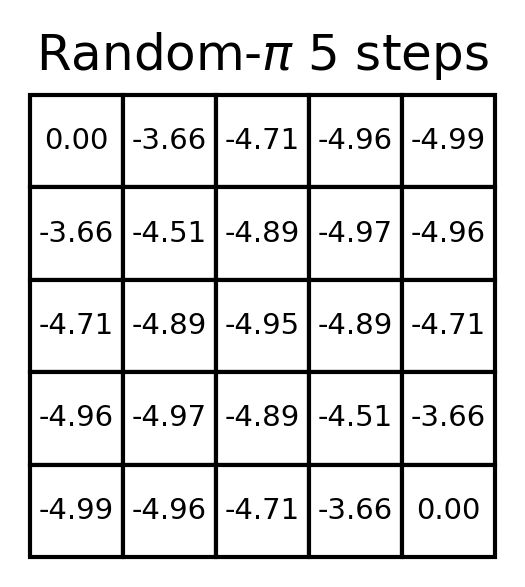

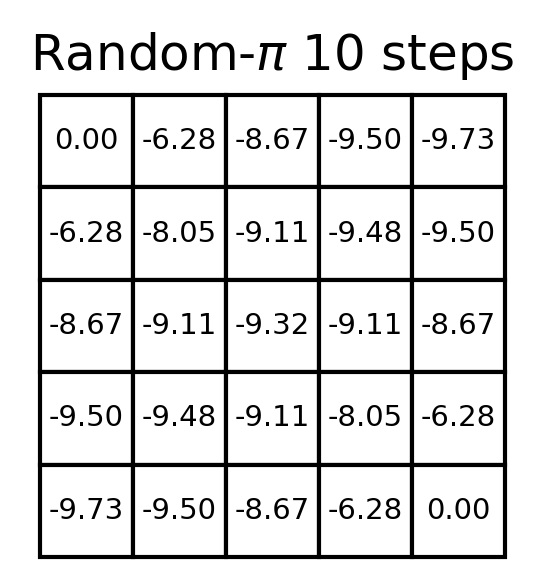

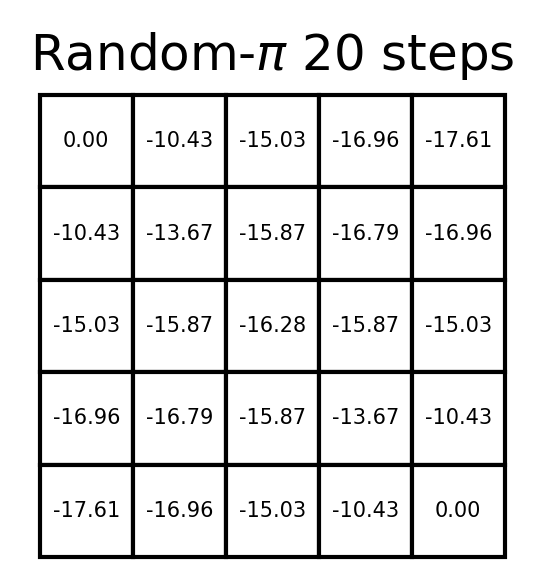

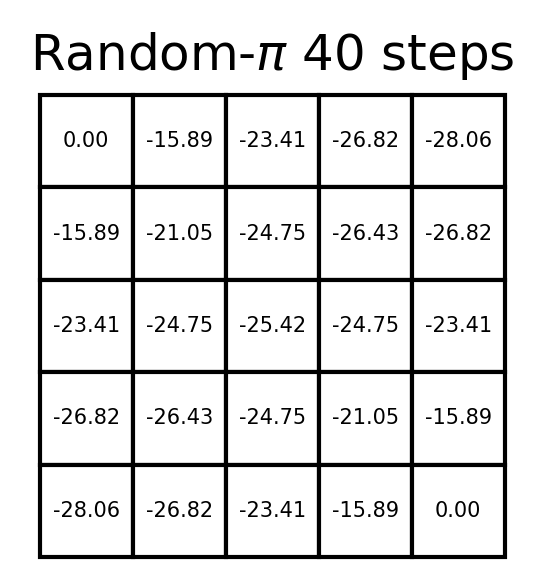

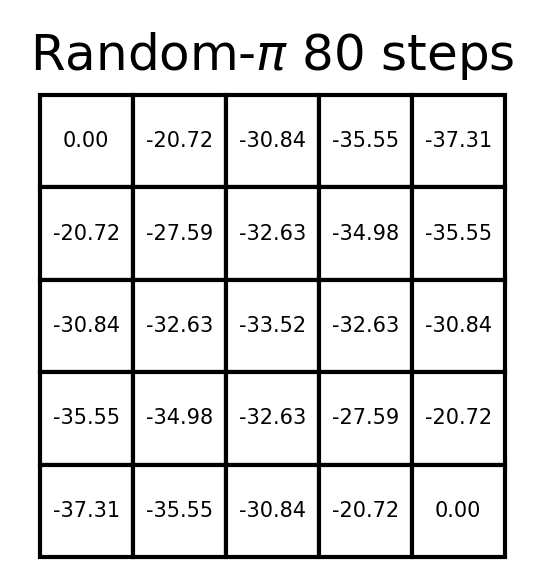

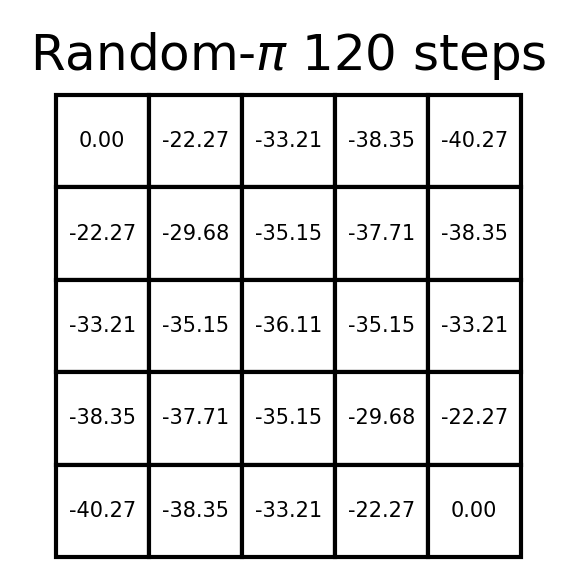

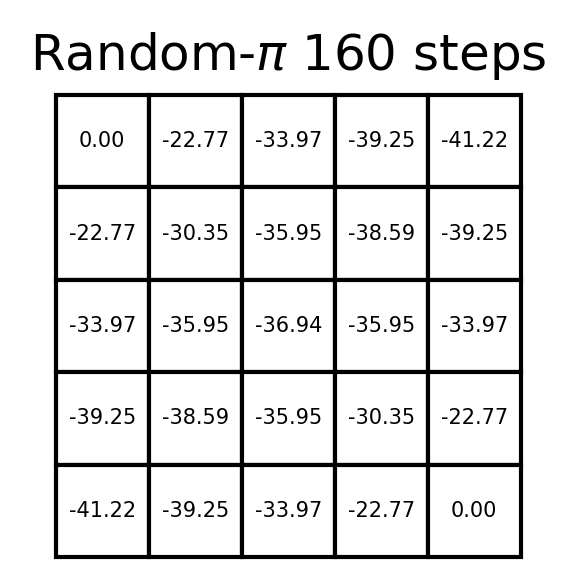

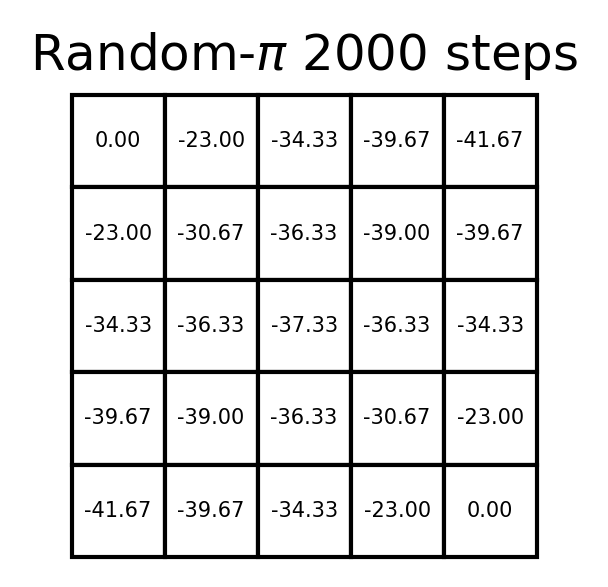

In [5]:

#Unneccesarily verbose and loopy for clarity
#Unneccesarily verbose and loopy for clarity
def updateVk(vk,policy):
    global gw
    nRow=vk.shape[0]
    nCol=vk.shape[1]
    vl=gw.getZeroGrid()
    for row in range(nRow):
        for col in range(nCol):
            #Check if we are in terminal state
            if (row,col) in gw.goal:
                continue
            
            #Update our value based on the Bellman equation
            vl[row][col]=-1
            for way in Dir:
                vl[row][col]+=policy[row][col][way]*gw.get(vk,row,col,way)
    return vl

#Reset the value to all zeros
vk=gw.getZeroGrid()
rp=gw.getRandomPolicyGrid()
vk=updateVk(vk,rp) #Do first updat
plotGridWorld(gw,vk,showCorners=True,title=r"Random-$\pi$ 1 step")

plotHere=[2,3,4,5,10,20,40,80,120,160,2000]
for i in range(2,2001):
    vk=updateVk(vk,rp)
    if i in plotHere:
        plotGridWorld(gw,vk,showCorners=True,title=r"Random-$\pi$ "+str(i)+" steps",applyFormat=True)


After ~160 steps the random walk policy has determined the optimal values of the squares. These values are essentially (-1 times) the average number of steps from that starting location to one of the goal states.

### Determining a better policy
We can also use our policy $\pi$ to determine a better policy by using the greedy algorithm. The greedy algorithm will favour the directions of most value (e.g. it will always move to the neighbouring square with highest value, if two or more squares have equal value they will have equal probability).

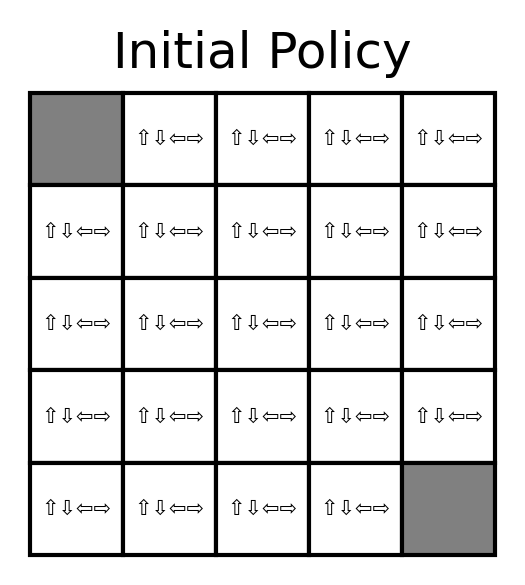

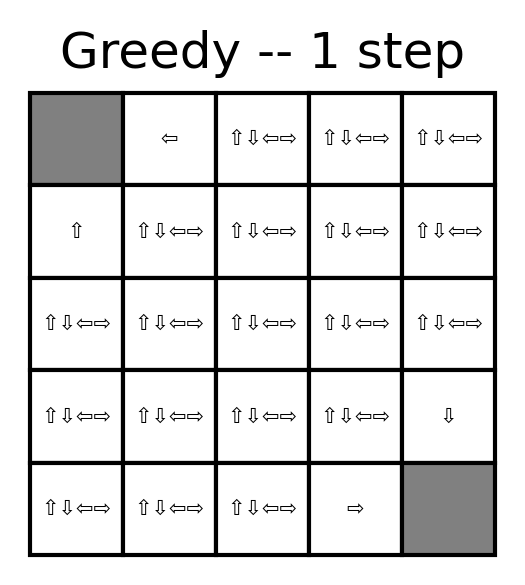

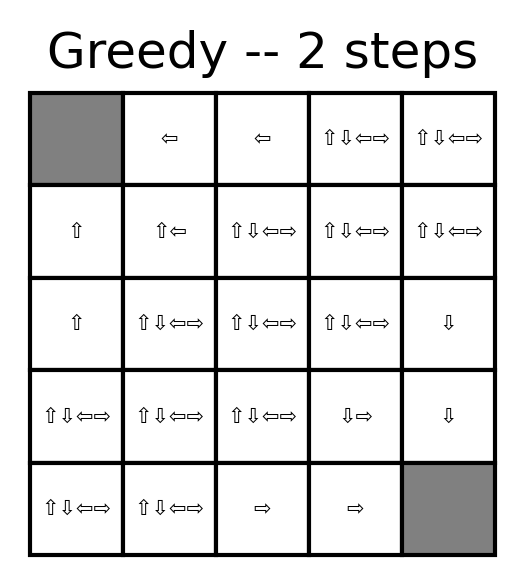

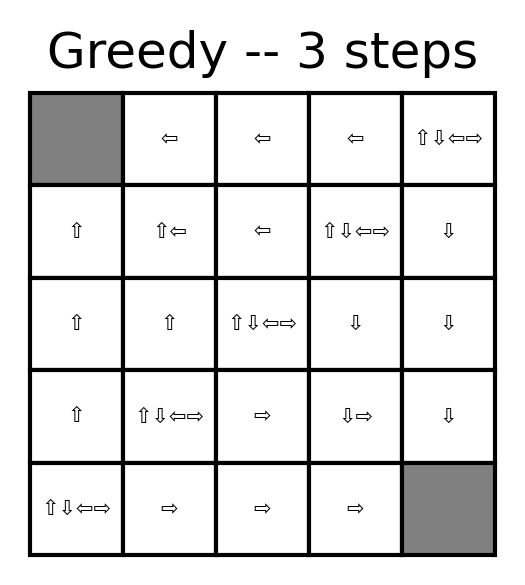

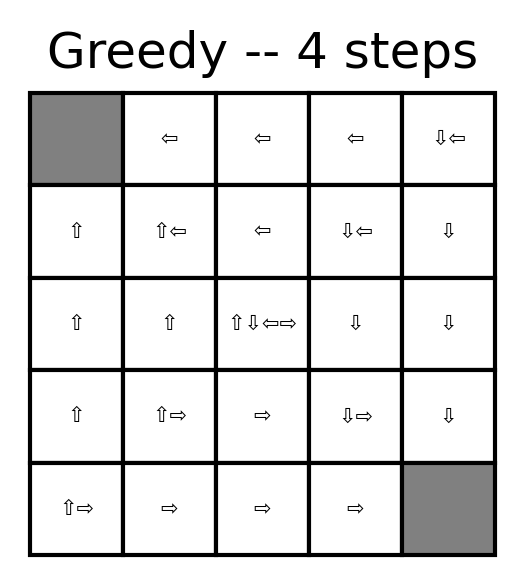

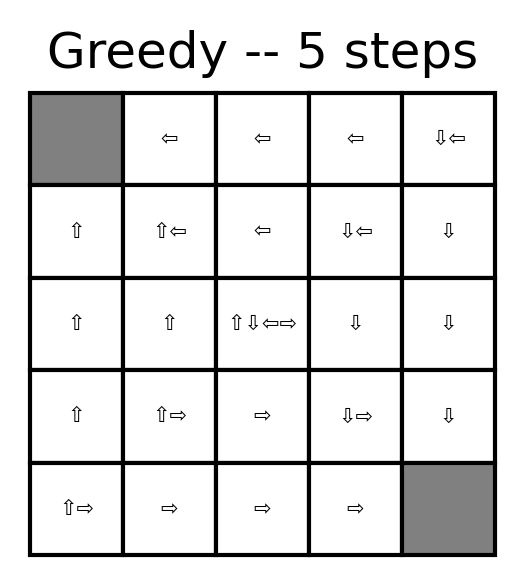

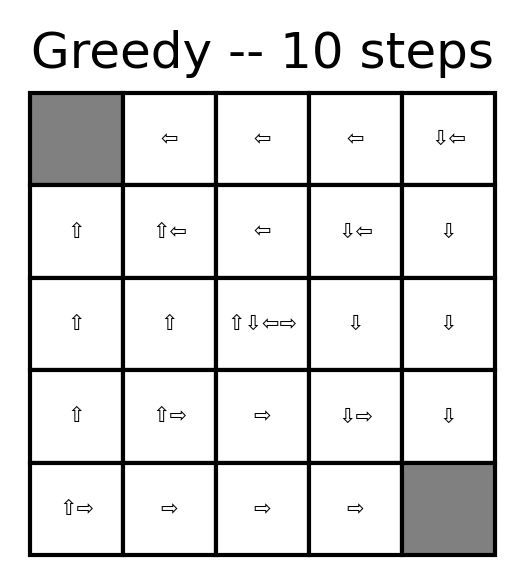

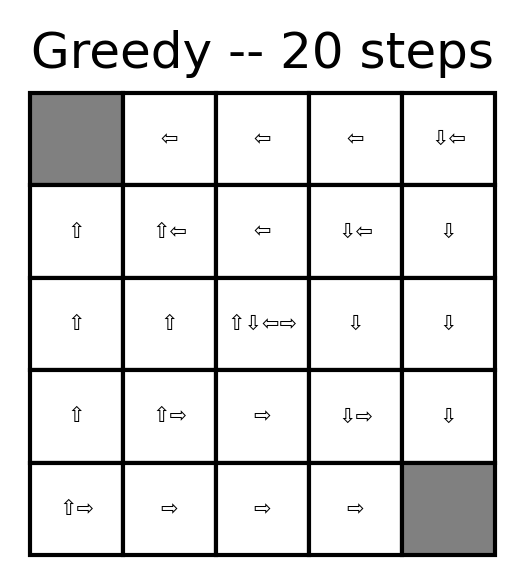

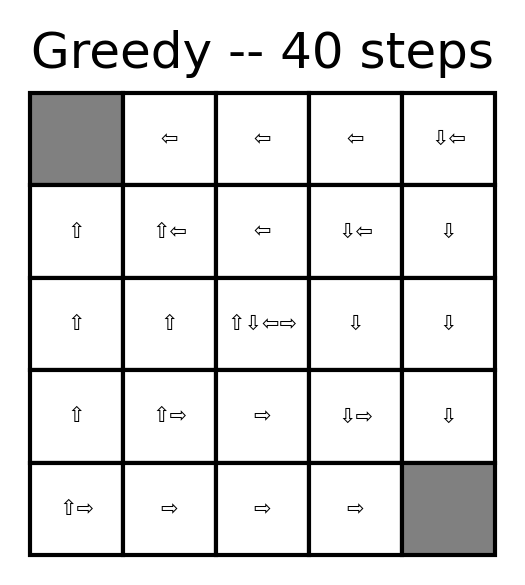

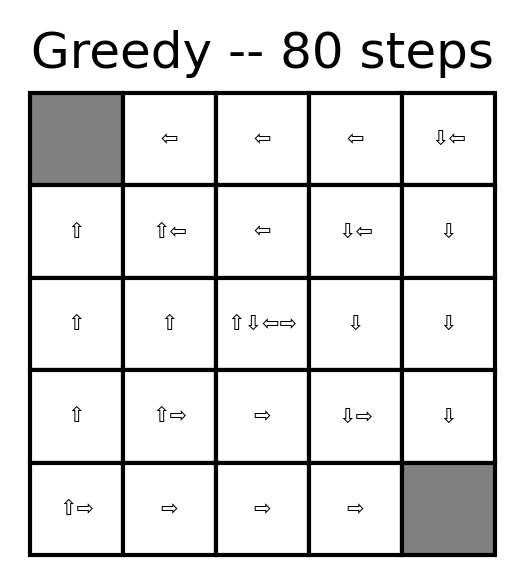

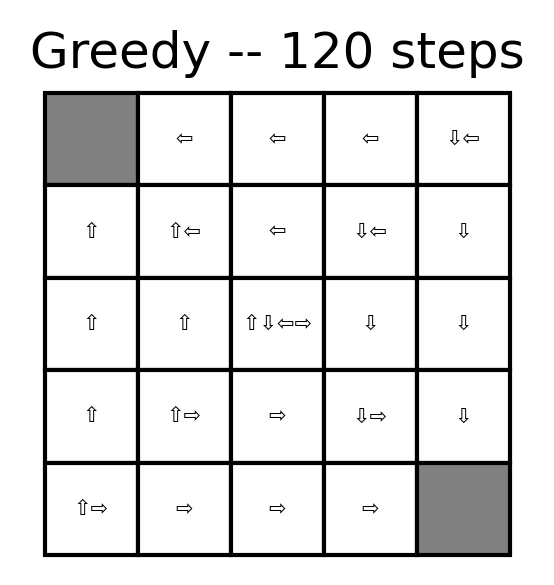

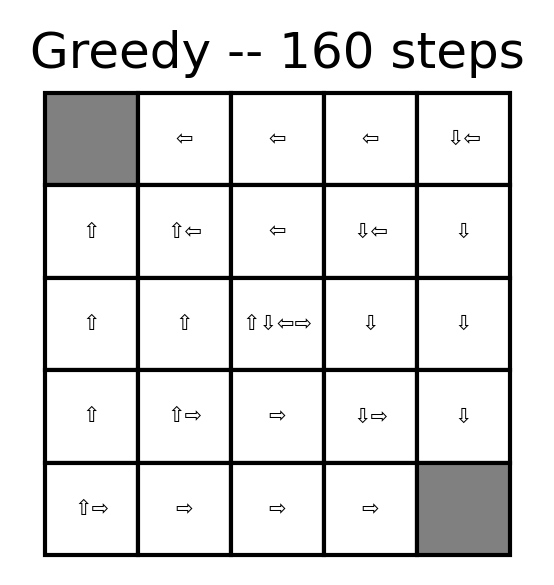

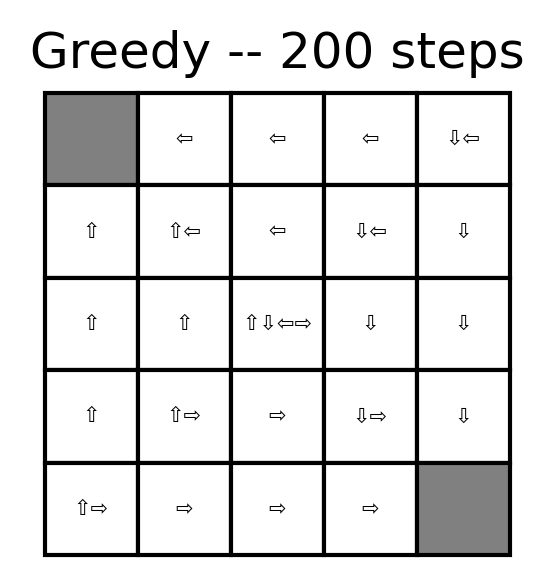

In [6]:
# Takes in a value array vk of size nRow*nCol
# Returns a policy array of size nRow*nCol*4 (for up,down,left,right)
# The policy return contains the probability that a particular action
# will be followed
def defineGreedyPolicy(vk):
    arrows='⇧⇩⇦⇨'
    nRow=vk.shape[0]
    nCol=vk.shape[1]
    pol=np.zeros((nRow,nCol,4))
    for row in range(nRow):
        for col in range(nCol):
            #Check if we are in terminal state
            if (row,col) in gw.goal:
                continue
            #Update our policy based on the current value of the cells nearby
            dirs=np.zeros(4)
            for way in Dir:
                dirs[way]=gw.get(vk,row,col,way)
                
            maxVal=np.max(dirs)
            #print(row,col,dirs)
            val=0
            for i in Dir:
                if dirs[i] >= maxVal-1e-9: #The 1e-9 is just for precision in larger grids
                    pol[row][col][i]=1
    
    #Normalise our probabilities
    for row in range(nRow):
        for col in range(nCol):
            norm=np.sum(pol[row][col])
            pol[row][col]=np.divide(pol[row][col],norm,out=np.zeros_like(pol[row][col]),where=norm!=0)
    
    
    return pol

def convertPolicyToString(pol):
    arrows='⇧⇩⇦⇨'
    nRow=pol.shape[0]
    nCol=pol.shape[1]
    arStr=[arrows]*(nRow*nCol)
    arStr=np.reshape(arStr,(nRow,nCol))
    for row in range(nRow):
        for col in range(nCol):
            val=''
            for way in Dir:
                if(pol[row][col][way]>0):
                    val+=arrows[way]
            arStr[row][col]=val
    return arStr


vk=gw.getZeroGrid()
policy=defineGreedyPolicy(vk)
plotGridWorld(gw,convertPolicyToString(policy),showCorners=False,title="Initial Policy")

plotHere=[1,2,3,4,5,10,20,40,80,120,160,200]
for i in range(1,201):
    vk=updateVk(vk,rp)
    policy=defineGreedyPolicy(vk)
    if i in plotHere:
        if i == 1:
            title="Greedy -- 1 step"
        else:
            title="Greedy -- "+str(i)+" steps"
        plotGridWorld(gw,convertPolicyToString(policy),showCorners=False,title=title)



## How do we do even better?
We start with any policy, $\pi$, then:
1. Use $\pi$ to evaluate the value, $V$
2. Use the greedy algorithm to determine a better policy, $\hat{\pi}_{*}$, based on moving to the highest value $V$
3. Rinse, repeat using $\pi=\hat{\pi}_{*}$,
4. Stop when we reach some convergence (e.g. when the values or policy don't change)

At this point we should have reached the optimal policy $\pi_*$

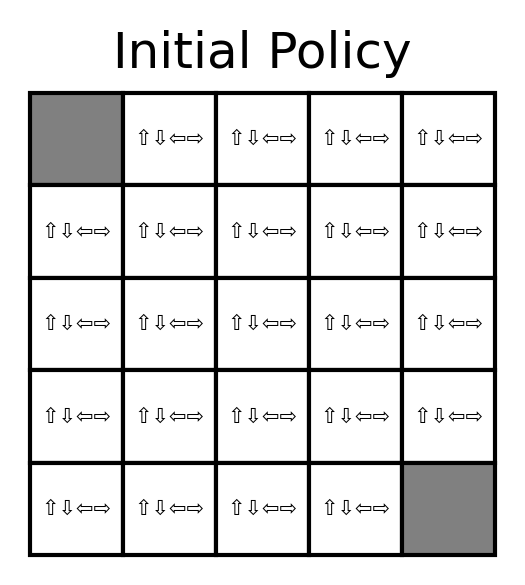

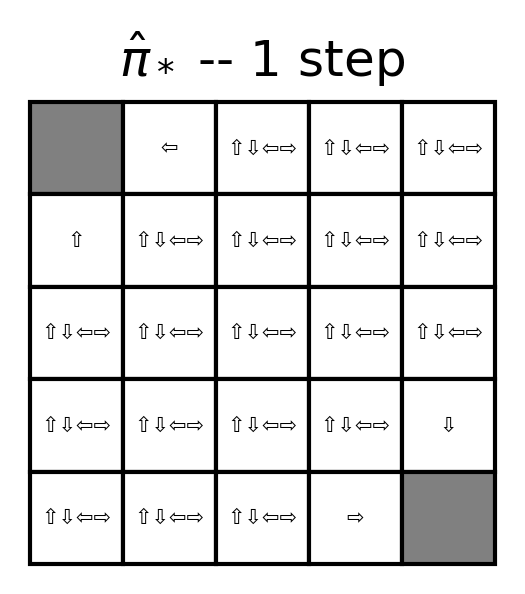

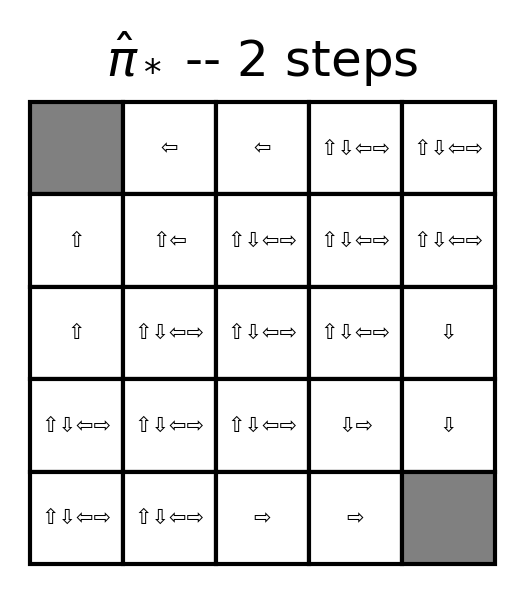

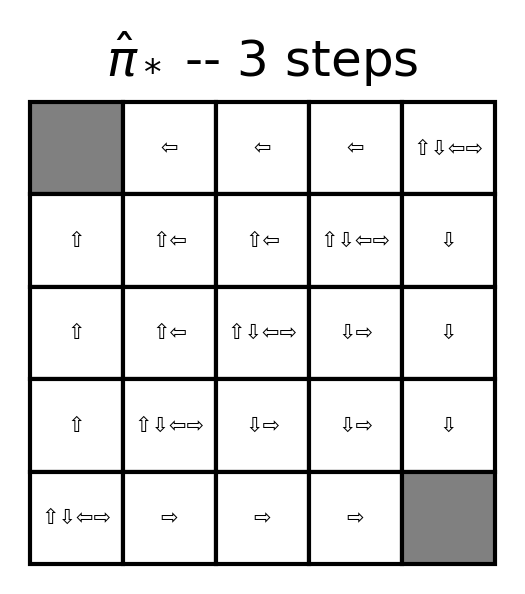

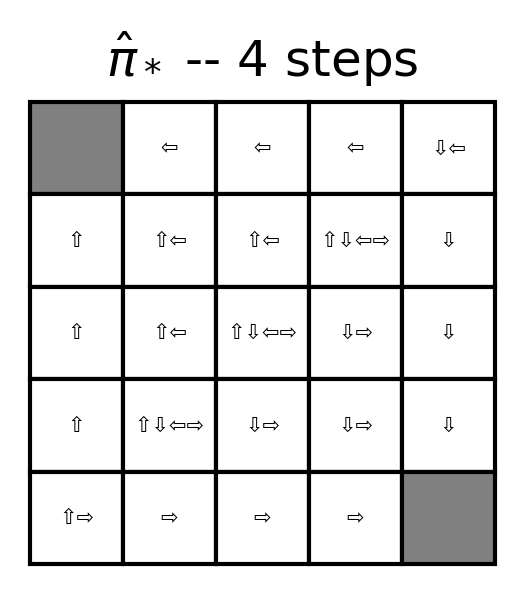

In [7]:
vk=gw.getZeroGrid()
policy=defineGreedyPolicy(vk)
plotGridWorld(gw,convertPolicyToString(policy),showCorners=False,title="Initial Policy")

plotHere=[1,2,3,4,5,6,7,8,9,10,20,40,80,120,160,200]
for i in range(1,5):
    vk=updateVk(vk,policy)
    policy=defineGreedyPolicy(vk)
    if i in plotHere:
        if i == 1:
            title=r"$\hat{\pi}_*$ -- 1 step"
        else:
            title=r"$\hat{\pi}_*$ -- "+str(i)+" steps"
        plotGridWorld(gw,convertPolicyToString(policy),showCorners=False,title=title)



### Have we reached the optimal policy??

To check we have reached the optimal policy we can try and use the policy to evaluate the optimal value function. 

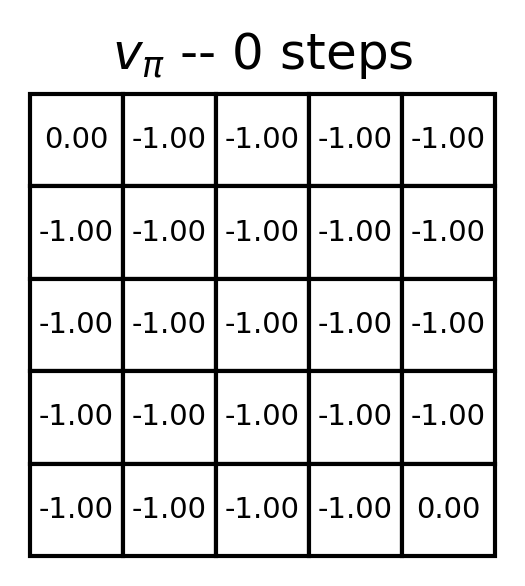

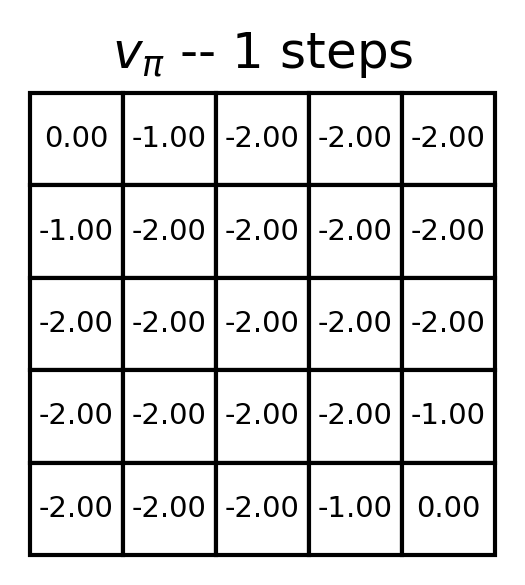

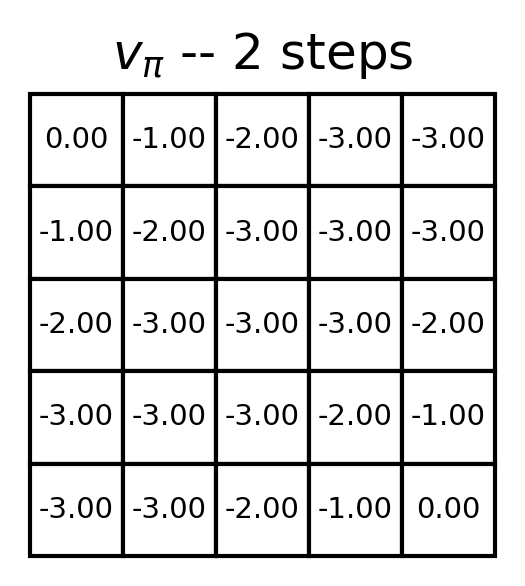

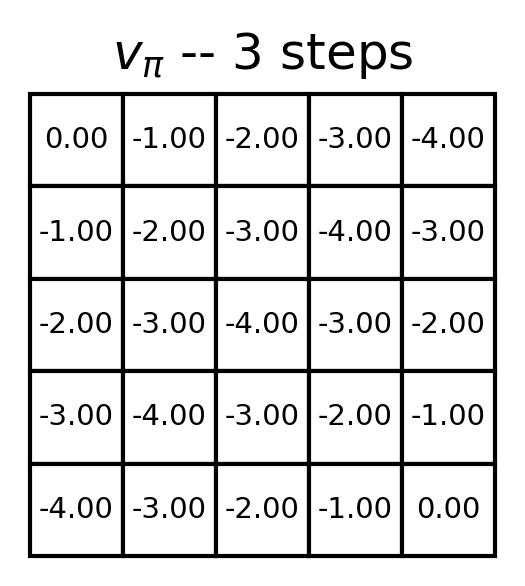

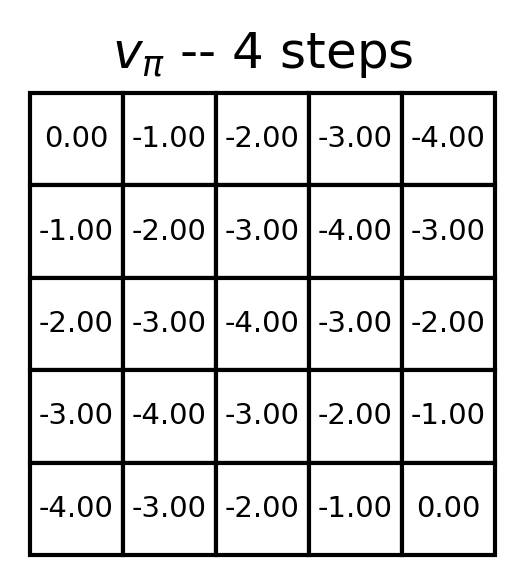

In [8]:
vk=gw.getZeroGrid()
pistar=policy
for i in range(5):
    vk=updateVk(vk,pistar)
    plotGridWorld(gw,vk,showCorners=True,title=r"$v_\pi$ -- "+str(i)+" steps",applyFormat=True)

### Summary
The optimal policy achieves the optimal value after $N-1$ steps, where $N$ is the size of grid (well $N \times N$).